# figuring out how to generate correlated random variables using Choletsky decomposition

In [3]:
import numpy as np 
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
XY = np.random.randn(2, 1000)

In [5]:
C = np.array([[1, 0.99],[0.99, 1]])
L = np.linalg.cholesky(C)

In [6]:
XY_corr = np.dot(L, XY)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


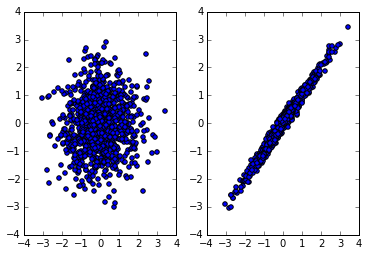

In [7]:
fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

[[ 0.33211461  0.32732946]
 [ 0.32732946  0.34186679]]


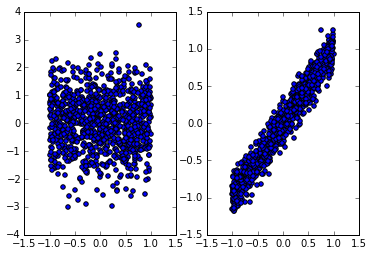

In [8]:
XY = np.zeros((2, 1000))
XY[0,:] = np.random.uniform(-1., 1., size=1000)
XY[1,:] = np.random.randn(1000)

XY_corr = np.dot(L, XY)

fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

print np.cov(XY_corr)

[[ 0.31261428  0.30694585]
 [ 0.30694585  0.30806052]]
[-0.64563645  0.80335192  0.66544065 -0.60246825 -0.10004731  0.57098973
  0.42275835 -0.21441152 -0.0523032  -0.8842028 ]
[-0.64563645  0.80335192  0.66544065 -0.60246825 -0.10004731  0.57098973
  0.42275835 -0.21441152 -0.0523032  -0.8842028 ]


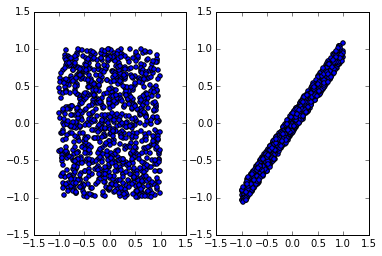

In [9]:
XY = np.zeros((2, 1000))
XY[0,:] = np.random.uniform(-1., 1., size=1000)
XY[1,:] = np.random.uniform(-1., 1., 1000)

XY_corr = np.dot(L, XY)

fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

print np.cov(XY_corr)
print XY[0,:10]
print XY_corr[0,:10]

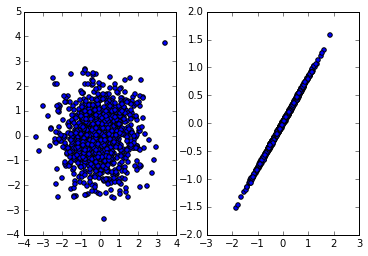

In [17]:
XY = np.random.randn(2, 1000)
XY_corr = np.dot(L, XY)
C = np.array([[0.3, 2*0.1224],[2*0.1224, 0.2]])
L = np.linalg.cholesky(C)
XY_corr = np.dot(L, XY)

fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

## Instead of Choletsky, we can use the error function
$$i_{rank} = \frac{1}{2} \left[1 - {\rm erf}(x / \sqrt{2}) \right]$$
where 
$$ x = \frac{SFR - <SFR>}{\sigma_{log SFR}}$$


In [10]:
from scipy.special import erfinv

[[ 0.97972242  0.1973816 ]
 [ 0.1973816   0.08909991]]
0.668061605326
[[ 1.00407164  0.1999674 ]
 [ 0.1999674   0.09028121]]


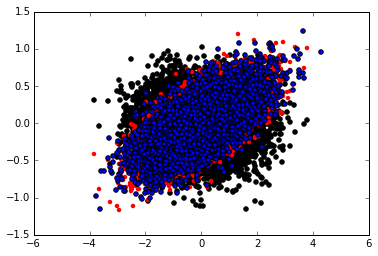

In [36]:
# scratch pad trying to figure out how assembly bias is induced
dMhalo = np.random.randn(10000)
isort = np.argsort(dMhalo)

irank = np.zeros(10000)
irank[isort] = np.arange(10000) + 0.5
irank /= 10000.

#dlogSFR = 0.2 * 1.414 * erfinv(1. - 2. * irank) + np.sqrt(0.3**2 - 0.2**2) * np.random.randn(1000)
dlogSFR = 0.2 * 1.414 * erfinv(2. * irank - 1.) + np.sqrt(0.3**2 - 0.2**2) * np.random.randn(10000)

plt.scatter(dMhalo, 0.3*np.random.randn(10000), c='k')
plt.scatter(dMhalo, dlogSFR, c='r', lw=0)

cov = np.cov(np.array([dMhalo, dlogSFR]))
print cov
r = cov[0,1]/np.sqrt(cov[0,0]*cov[1,1])
print r

XY = np.random.randn(2, 10000)
XY_corr = np.dot(L, XY)
C = np.array([[1.,r*np.sqrt(0.09)],[r*np.sqrt(0.09), 0.09]])
L = np.linalg.cholesky(C)
XY_corr = np.dot(L, XY)
plt.scatter(XY_corr[0,:], XY_corr[1,:])
print np.cov(XY_corr)

#plt.xlim([-1, 1])
#plt.ylim([-1., 1.])